In [ ]:
import gdown

url = 'https://drive.google.com/uc?export=download&id=1B75cOYH7VCaiqdeQYvMuUuy_Mn_5tPMY'
output = 'data.zip'
gdown.download(url, output, quiet=False)

#Dataset address
data_dir='./data.zip'

import zipfile
with zipfile.ZipFile(data_dir, 'r') as zf:
    zf.extractall('./')
    print('Done downloading and extraction')

!rm './data.zip' 

import numpy as np
from glob import glob


Downloading...
From: https://drive.google.com/uc?export=download&id=1B75cOYH7VCaiqdeQYvMuUuy_Mn_5tPMY
To: /content/data.zip
100%|██████████| 46.1M/46.1M [00:00<00:00, 120MB/s]


Done downloading and extraction
There are 0 total chest xray images.


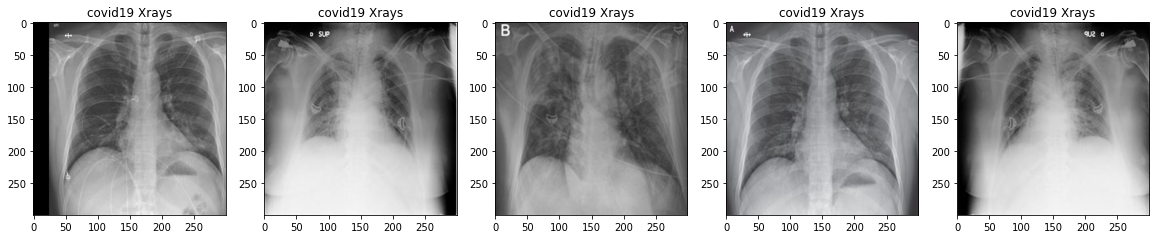

In [ ]:
import matplotlib.pyplot as plt
import random
import os

plt.figure(figsize = (20,20))

for i in range(5):
    img_path  = random.choice(os.listdir('/content/train/covid/'))
    img = plt.imread('/content/train/covid/' + img_path)
    ax = plt.subplot(1,5,i+1)
    ax.title.set_text('covid19 Xrays')
    plt.imshow(img)

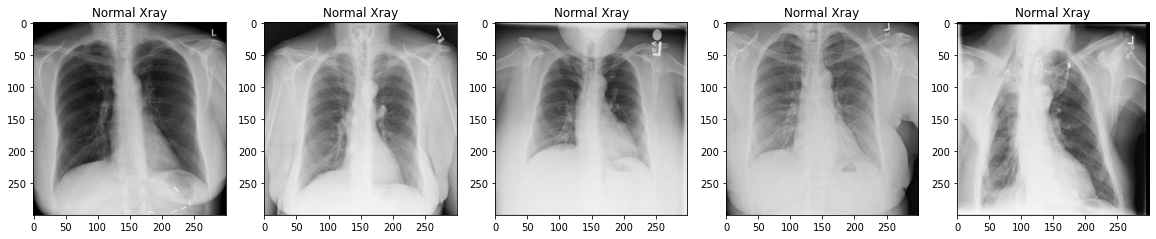

In [ ]:
plt.figure(figsize = (20,20))

for i in range(5):
    img_path  = random.choice(os.listdir('/content/train/normal/'))
    img = plt.imread('/content/train/normal/' + img_path)
    ax = plt.subplot(1,5,i+1)
    ax.title.set_text('Normal Xray')
    plt.imshow(img)

In [1]:
import seaborn as sns
import pandas as pd

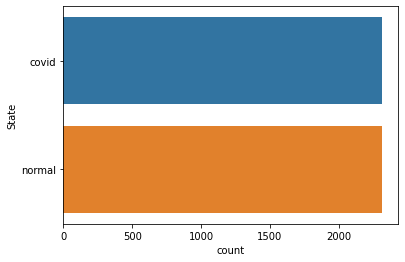

In [ ]:
h = []
def plotcount(dir):
  for i in range(len(os.listdir(dir+'covid/'))):
    h.append('covid')
    
  for i in range(len(os.listdir(dir+'normal/'))):
    h.append('normal')
    data = pd.DataFrame(h, columns = ['State'])
  return data
data = plotcount('/content/data/train/')
data = plotcount('/content/data/test/')
data = plotcount('/content/data/valid/')
sns.countplot(y = 'State', data = data)

In [ ]:
def plotcount(dir):
  y = []
  for i in range(len(os.listdir(dir+'covid/'))):
    y.append('covid')
    
  for i in range(len(os.listdir(dir+'normal/'))):
    y.append('normal')
    data = pd.DataFrame(y, columns = ['State'])
  sns.countplot(y = 'State', data = data)

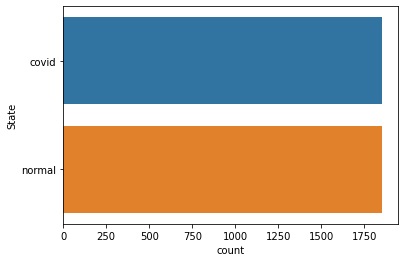

In [ ]:
plotcount('/content/data/train/')

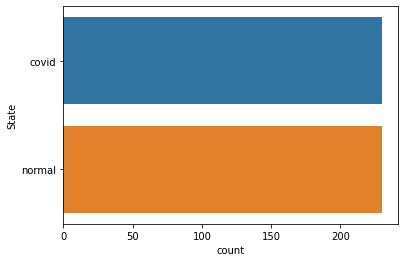

In [ ]:
plotcount('/content/data/test/')

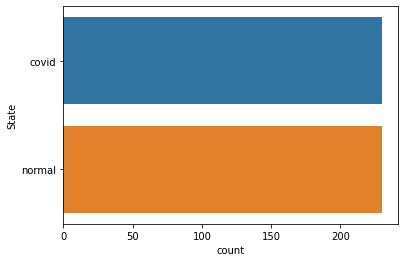

In [ ]:
plotcount('/content/data/valid/')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv("/content/drive/My Drive/Untitled folder/RFHist.csv")

In [5]:
data

,Model,Metric,Value
0,Decision Tree,Accuracy,86.82
1,Decision Tree,Precision,88.63
2,Decision Tree,Recall,84.41
3,Decision Tree,F1 score,86.47
4,Decision Tree,AUC,86.81
5,Logistic Regression,Accuracy,89.20
6,Logistic Regression,Precision,89.17
7,Logistic Regression,Recall,89.17
8,Logistic Regression,F1 score,89.17
9,Logistic Regression,AUC,89.20


In [6]:
models = ['DT', 'LR', 'SVM', 'CNN', 'VGG19', 'ResNet50', 'AlexNet']

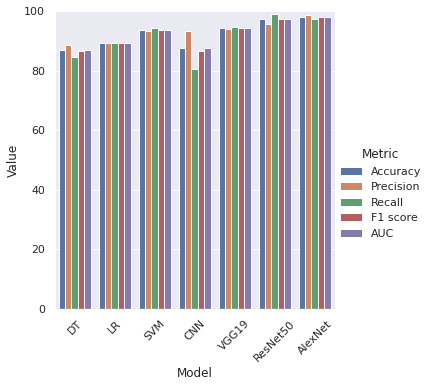

In [11]:
sns.set( rc = {'figure.figsize' : ( 50, 50 ), 
               'axes.labelsize' : 12 })

p = sns.catplot(x="Model", y = "Value", hue = "Metric", kind= 'bar', data = data)
p.set(ylim = (0,100))
p.set_xticklabels( models, rotation=45 )